In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)             # To get diffent different colors
pd.set_option('display.max_columns', None)  # To display the max columns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [60]:
df=pd.read_csv("E:\\Naresh IT\\Sample\\Visadataset.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [61]:
df.columns,df.shape

(Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
        'requires_job_training', 'no_of_employees', 'yr_of_estab',
        'region_of_employment', 'prevailing_wage', 'unit_of_wage',
        'full_time_position', 'case_status'],
       dtype='object'),
 (25480, 12))

In [62]:
# Case_id and yr_of_estab are just a ID,year
# so that we can drop these columns

In [63]:
df.drop(columns=['yr_of_estab','case_id'],axis=1,inplace=True)

In [64]:
df.shape

(25480, 10)

In [65]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified


In [66]:
df.select_dtypes(include='object').nunique()

continent                6
education_of_employee    4
has_job_experience       2
requires_job_training    2
region_of_employment     5
unit_of_wage             4
full_time_position       2
case_status              2
dtype: int64

In [67]:
df.select_dtypes(include=['int','float']).nunique()

no_of_employees     7105
prevailing_wage    25454
dtype: int64

In [68]:
#check the missing value
check_missing=df.isnull().sum()
check_missing

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [69]:
#binary classification
df['case_status'].value_counts()

Certified    17018
Denied        8462
Name: case_status, dtype: int64

# Label Encoding for Object Datatypes

In [70]:
for col in df.select_dtypes(include='object').columns:
    print(col,':',df[col].unique())

continent : ['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']
education_of_employee : ['High School' "Master's" "Bachelor's" 'Doctorate']
has_job_experience : ['N' 'Y']
requires_job_training : ['N' 'Y']
region_of_employment : ['West' 'Northeast' 'South' 'Midwest' 'Island']
unit_of_wage : ['Hour' 'Year' 'Week' 'Month']
full_time_position : ['Y' 'N']
case_status : ['Denied' 'Certified']


In [71]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include='object').columns:
    
    # Initialize a LabelEncoder object
    label_encoder=preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col]=label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(col,':',df[col].unique())


continent : [1 0 3 2 5 4]
education_of_employee : [2 3 0 1]
has_job_experience : [0 1]
requires_job_training : [0 1]
region_of_employment : [4 2 3 1 0]
unit_of_wage : [0 3 2 1]
full_time_position : [1 0]
case_status : [1 0]


<Axes: >

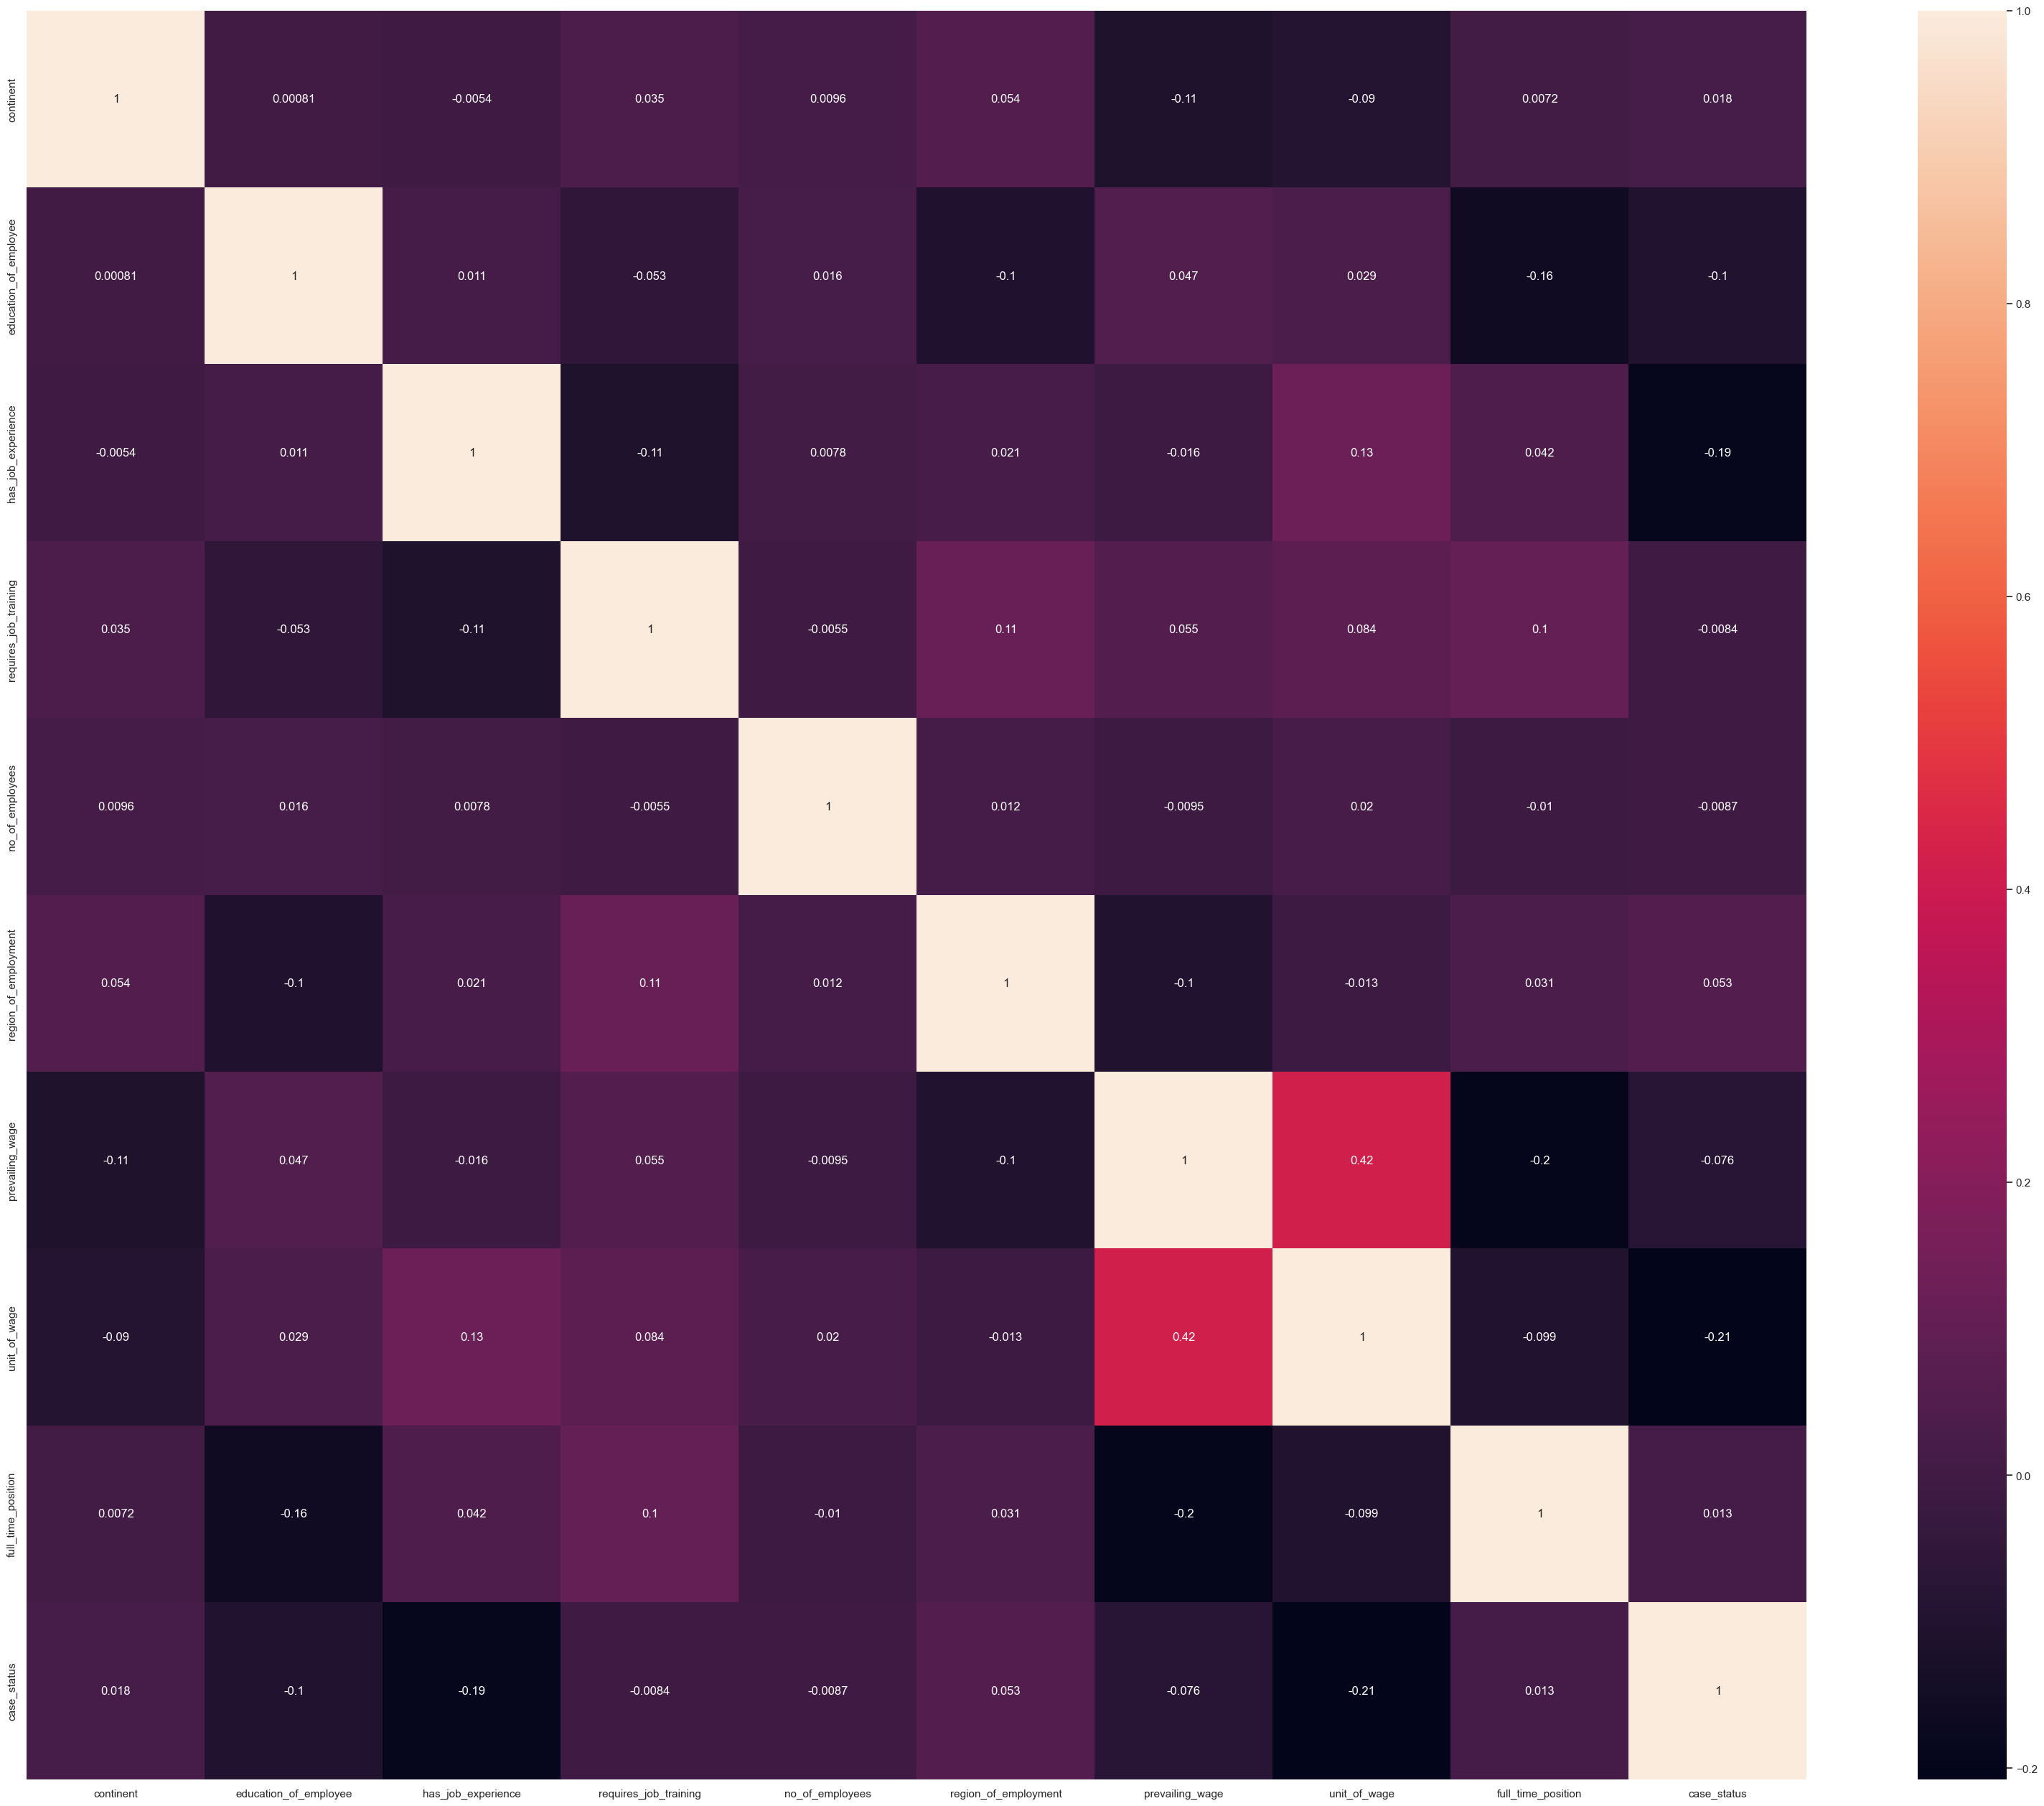

In [72]:
# Correlation Heatmap
plt.figure(figsize=(40, 32))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

# Train Test Split

- Target_columns= 'Customer Status'
- Other than customer status all are input columns

In [73]:
X=df.drop('case_status',axis=1)
y=df['case_status']

In [74]:
# Then divide data into 4 parts
# X_train
# X_test
# y_train
# y_test
# test_size=0.2 :     80% train data and 20% is the test data

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=1234,test_size=0.20)

In [76]:
print(X_train.shape),
print(X_test.shape),
print(y_train.shape),
print(y_test.shape)

(20384, 9)
(5096, 9)
(20384,)
(5096,)


# Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [78]:
y_predict_dt=dt.predict(X_test)
y_predict_dt

array([1, 0, 1, ..., 0, 0, 0])

In [79]:
dt_cmt=confusion_matrix(y_predict_dt,y_test)
dt_accuracy=accuracy_score(y_predict_dt,y_test)
dt_precision=precision_score(y_predict_dt,y_test)
dt_recall=recall_score(y_predict_dt,y_test)
dt_f1=f1_score(y_predict_dt,y_test)

In [80]:
tn, fp, fn ,tp = dt_cmt.ravel()
print('True negative',tn)
print('False positive',fp)
print('False negative',fn)
print('True positive',tp)

True negative 2530
False positive 827
False negative 924
True positive 815


In [81]:
dt_metrics={}
dt_metrics['accuracy']=round(dt_accuracy,2)
dt_metrics['precision']=round(dt_precision,2)
dt_metrics['recall']=round(dt_recall,2)
dt_metrics['F1']=round(dt_f1,2)
dt_metrics

{'accuracy': 0.66, 'precision': 0.5, 'recall': 0.47, 'F1': 0.48}

In [82]:
metrics_dt=pd.DataFrame(dt_metrics,index=['Decsion_Tree'])
metrics_dt

,accuracy,precision,recall,F1
Decsion_Tree,0.66,0.5,0.47,0.48


# Naive Bayes

In [83]:
####################################  NB  ##########################################
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

################################### Predict  #######################################
y_predict_nb=nb.predict(X_test)
y_predict_nb

################################## Confusion metrix ###############################
nb_cmt=confusion_matrix(y_predict_nb,y_test)

##################################    metrix    ################################
nb_accuracy=accuracy_score(y_predict_nb,y_test)
nb_precision=precision_score(y_predict_nb,y_test)
nb_recall=recall_score(y_predict_nb,y_test)
nb_f1=f1_score(y_predict_nb,y_test)

nb_metrics={}
nb_metrics['accuracy']=round(nb_accuracy,2)
nb_metrics['precision']=round(nb_precision,2)
nb_metrics['recall']=round(nb_recall,2)
nb_metrics['F1']=round(nb_f1,2)
nb_metrics

##################################  Data frame    ################################
metrics_nb=pd.DataFrame(nb_metrics,index=['Naive_Bayes'])
metrics_nb

,accuracy,precision,recall,F1
Naive_Bayes,0.7,0.1,0.76,0.18


# KNN

In [88]:
####################################  knn  ##########################################
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

################################### Predict  #######################################
y_predict_knn=knn.predict(X_test)
y_predict_knn

################################## Confusion metrix ###############################
knn_cmt=confusion_matrix(y_predict_knn,y_test)

##################################    metrix    ################################
knn_accuracy=accuracy_score(y_predict_knn,y_test)
knn_precision=precision_score(y_predict_knn,y_test)
knn_recall=recall_score(y_predict_knn,y_test)
knn_f1=f1_score(y_predict_knn,y_test)

knn_metrics={}
knn_metrics['accuracy']=round(knn_accuracy,2)
knn_metrics['precision']=round(knn_precision,2)
knn_metrics['recall']=round(knn_recall,2)
knn_metrics['F1']=round(knn_f1,2)
knn_metrics

##################################  Data frame    ################################
metrics_knn=pd.DataFrame(knn_metrics,index=['K-Neighbors'])
metrics_knn

,accuracy,precision,recall,F1
K-Neighbors,0.64,0.28,0.41,0.33


# Logistic Regression

In [85]:
####################################  lr  ##########################################
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

################################### Predict  #######################################
y_predict_lr=lr.predict(X_test)
y_predict_lr

################################## Confusion metrix ###############################
lr_cmt=confusion_matrix(y_predict_lr,y_test)

##################################    metrix    ################################
lr_accuracy=accuracy_score(y_predict_lr,y_test)
lr_precision=precision_score(y_predict_lr,y_test)
lr_recall=recall_score(y_predict_lr,y_test)
lr_f1=f1_score(y_predict_lr,y_test)

lr_metrics={}
lr_metrics['accuracy']=round(lr_accuracy,2)
lr_metrics['precision']=round(lr_precision,2)
lr_metrics['recall']=round(lr_recall,2)
lr_metrics['F1']=round(lr_f1,2)
lr_metrics

##################################  Data frame    ################################
metrics_lr=pd.DataFrame(lr_metrics,index=['Logistic_Regression'])
metrics_lr

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,precision,recall,F1
Logistic_Regression,0.68,0.0,0.0,0.0


# Random Forest

In [86]:
####################################  rf  ##########################################
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

################################### Predict  #######################################
y_predict_rf=rf.predict(X_test)
y_predict_rf

################################## Confusion metrix ###############################
rf_cmt=confusion_matrix(y_predict_rf,y_test)

##################################    metrix    ################################
rf_accuracy=accuracy_score(y_predict_rf,y_test)
rf_precision=precision_score(y_predict_rf,y_test)
rf_recall=recall_score(y_predict_rf,y_test)
rf_f1=f1_score(y_predict_rf,y_test)

rf_metrics={}
rf_metrics['accuracy']=round(rf_accuracy,2)
rf_metrics['precision']=round(rf_precision,2)
rf_metrics['recall']=round(rf_recall,2)
rf_metrics['F1']=round(rf_f1,2)
rf_metrics
##################################  Data frame    ################################
metrics_rf=pd.DataFrame(rf_metrics,index=['Random_forest'])
metrics_rf

,accuracy,precision,recall,F1
Random_forest,0.72,0.51,0.57,0.54


In [89]:
All=pd.concat([metrics_dt,metrics_nb,metrics_knn,metrics_lr, metrics_rf])
All

,accuracy,precision,recall,F1
Decsion_Tree,0.66,0.50,0.47,0.48
Naive_Bayes,0.70,0.10,0.76,0.18
K-Neighbors,0.64,0.28,0.41,0.33
Logistic_Regression,0.68,0.00,0.00,0.00
Random_forest,0.72,0.51,0.57,0.54


# In the end, we got the best accuracy in Random Forest model.